# Processing Large Pandas dataframes using Dask (open source)

![Figure 1: Big data tools used by Python developers (>100%). Sourced from JetBrains.](https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/dask/dask-pic3.png "Figure 1: Big data tools used by Python developers (from Jetbrains)")

Data can be found at: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [ ]:
!pip install dask-labextension

In [17]:
from dask.distributed import Client

client = Client()
client

C:\Python311\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61117 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:61117/status,
Dashboard: http://127.0.0.1:61117/status,Workers: 4
Total threads: 4,Total memory: 15.82 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61120,Workers: 4
Dashboard: http://127.0.0.1:61117/status,Total threads: 4
Started: Just now,Total memory: 15.82 GiB
Comm: tcp://127.0.0.1:61141,Total threads: 1
Dashboard: http://127.0.0.1:61145/status,Memory: 3.95 GiB
Nanny: tcp://127.0.0.1:61123,


In [2]:
import glob

# Specify the path to the folder containing the Parquet files
folder_path = 'C:\\Users\\Administrator\\Downloads\\nyc-taxi-data'  # Replace with your folder path

# Create the pattern to match all .parquet files in the folder
pattern = f"{folder_path}/*.parquet"

# Use glob to find all files matching the pattern
parquet_files = glob.glob(pattern)

# Optionally, print the list of found file paths
for file in parquet_files:
    print(file)

C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-01.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-02.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-03.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-04.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-05.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-06.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-07.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-08.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-09.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-10.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-11.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yellow_tripdata_2020-12.parquet
C:\Users\Administrator\Downloads\nyc-taxi-data\yello

In [3]:
# Read a sample parquet file
import pandas as pd
df = pd.read_parquet('C:\\Users\\Administrator\\Downloads\\nyc-taxi-data\\yellow_tripdata_2023-12.parquet')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.0,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.3,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.5,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.4,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0


## Trying to load the individual parquet files as dataframes and merge them all together.

In [84]:
import pandas as pd
import os

total_rows = 0

# Initialize an empty list to store the DataFrames
df_list = []

for file in parquet_files:
    
    # Read the parquet file
    df = pd.read_parquet(file)
    total_rows += df.shape[0]
    
    # Append to the list
    df_list.append(df)

print(total_rows)

# Concatenate all DataFrames into one
final_df = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the final DataFrame
print(final_df.head())

ArrowMemoryError: malloc of size 101580608 failed

In [85]:
total_rows

75370983

## Creating a dask dataframe and analyzing the data

In [18]:
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd

# Assuming files are stored in a directory structure similar to 'data/nyc_taxi/'
files = 'C:\\Users\\Administrator\\Downloads\\nyc-taxi-data\\*.parquet'

columns_to_load = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'fare_amount', 'total_amount']  
ddf = dd.read_parquet(files, engine='pyarrow', columns=columns_to_load)

# Display basic information about the DataFrame
print(ddf)

# Dask is lazy and doesn't load data until necessary
print("ddf.columns: \n", ddf.columns)
print("ddf.dtypes: \n", ddf.dtypes)
print("ddf.npartitions: \n", ddf.npartitions)

<dask_expr.expr.DataFrame: expr=ReadParquetFSSpec(cbe837b)>
ddf.columns: 
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'fare_amount', 'total_amount'],
      dtype='object')
ddf.dtypes: 
 VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
total_amount                    float64
dtype: object
ddf.npartitions: 
 48


Example 1: Average Fare Amount and Average trip distance

In [19]:
ddf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,total_amount
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,6.0,11.27
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,7.0,12.30
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,6.0,10.80
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,5.5,8.16
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,3.5,4.80


In [7]:
ddf.partitions[0].compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,total_amount
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,6.00,11.27
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,7.00,12.30
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,6.00,10.80
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,5.50,8.16
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,3.50,4.80
...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,52.18,55.73
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,54.01,63.68
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,38.02,47.69
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,28.74,31.79


In [8]:
ddf.partitions[47].compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,total_amount
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,10.00,16.50
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,9.30,17.15
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,13.50,21.50
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,7.20,12.20
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,11.40,18.40
...,...,...,...,...,...,...,...
3376562,2,2023-12-31 23:04:34,2023-12-31 23:13:58,NaN,1.34,12.08,16.08
3376563,2,2023-12-31 23:08:15,2023-12-31 23:08:23,NaN,0.00,25.98,27.48
3376564,2,2023-12-31 23:16:15,2023-12-31 23:30:28,NaN,3.71,16.68,18.18
3376565,2,2023-12-31 23:21:58,2023-12-31 23:34:29,NaN,5.20,19.64,23.64


In [9]:
## get the type of all partitions
ddf.map_partitions(type).compute()

0     <class 'pandas.core.frame.DataFrame'>
1     <class 'pandas.core.frame.DataFrame'>
2     <class 'pandas.core.frame.DataFrame'>
3     <class 'pandas.core.frame.DataFrame'>
4     <class 'pandas.core.frame.DataFrame'>
5     <class 'pandas.core.frame.DataFrame'>
6     <class 'pandas.core.frame.DataFrame'>
7     <class 'pandas.core.frame.DataFrame'>
8     <class 'pandas.core.frame.DataFrame'>
9     <class 'pandas.core.frame.DataFrame'>
10    <class 'pandas.core.frame.DataFrame'>
11    <class 'pandas.core.frame.DataFrame'>
12    <class 'pandas.core.frame.DataFrame'>
13    <class 'pandas.core.frame.DataFrame'>
14    <class 'pandas.core.frame.DataFrame'>
15    <class 'pandas.core.frame.DataFrame'>
dtype: object

In [10]:
## get the length of all partitions
ddf.map_partitions(len).compute()

0     15712062
1      1136285
2      3148715
3      4652030
4      4666630
5      7512560
6      8574296
7     10150822
8      9071244
9     10746339
10     9510838
11    10327677
12     9384487
13    10109133
14     8578039
15    10238567
dtype: int64

In [11]:
## get the length of all partitions
count_df = pd.DataFrame(ddf.map_partitions(len).compute())

In [12]:
count_df.sum()

0    133519724
dtype: int64

In [2]:
ddf.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'fare_amount', 'total_amount'],
      dtype='object')

In [21]:
# Dask DataFrame operations, similar to pandas but operating out-of-core / in parallel
average_fare = ddf['fare_amount'].mean()
#average_distance = ddf['trip_distance'].mean()

# Computing the averages - will trigger actual computation
print("Average fare amount:", average_fare.compute())
#print("Average trip distance:", average_distance.compute())

Average fare amount: 14.147018345843799


In [56]:
ddf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,total_amount
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,6.0,11.27
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,7.0,12.30
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,6.0,10.80
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,5.5,8.16
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,3.5,4.80


In [57]:
ddf.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'fare_amount', 'total_amount'],
      dtype='object')

To calculate the trip duration, you should first ensure that the tpep_pickup_datetime and tpep_dropoff_datetime columns are of datetime type. If they are not, you need to convert them. Then, subtract the tpep_pickup_datetime from tpep_dropoff_datetime to get the duration. Here's how you can do it:

In [3]:
# Convert pickup and dropoff datetime columns to datetime type if not already
ddf['tpep_pickup_datetime'] = dd.to_datetime(ddf['tpep_pickup_datetime'])
ddf['tpep_dropoff_datetime'] = dd.to_datetime(ddf['tpep_dropoff_datetime'])

# Calculate the trip duration and create a new column for it
# The result will be a timedelta object representing the duration
ddf['trip_duration'] = ddf['tpep_dropoff_datetime'] - ddf['tpep_pickup_datetime']

# Show the head of the DataFrame to verify the new column
ddf.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,total_amount,trip_duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,6.0,11.27,0 days 00:04:48
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,7.0,12.30,0 days 00:07:25
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,6.0,10.80,0 days 00:06:11
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,5.5,8.16,0 days 00:04:51
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,3.5,4.80,0 days 00:02:18


In [5]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Year-Month from the pickup datetime
ddf['year_month'] = ddf['tpep_pickup_datetime'].dt.to_period('M')

# Group by 'year_month' and count the number of trips
monthly_trip_counts = ddf.groupby('year_month').size()

# Compute to get a Pandas Series for visualization
monthly_trip_counts_pd = monthly_trip_counts.compute()

# Define the cutoff period
cutoff_period = pd.Period('2020-01', freq='M')

# Filter the Series for periods after the cutoff
filtered_data = monthly_trip_counts_pd[monthly_trip_counts_pd.index > cutoff_period]

In [12]:
monthly_trip_counts.compute()

year_month
2003-01         26
2008-12        175
2009-01        348
2019-12        131
2020-01    6405096
            ...   
2023-09    2846741
2023-10    3522269
2023-11    3339731
2023-12    3376527
2024-01          6
Freq: M, Length: 67, dtype: int64

In [13]:
subset_df = pd.DataFrame(monthly_trip_counts.compute())

In [20]:
subset_df = subset_df.head().reset_index().rename(columns = {0:'ride_count'})
subset_df.head()

,year_month,ride_count
0,2003-01,26
1,2008-12,175
2,2009-01,348
3,2019-12,131
4,2020-01,6405096


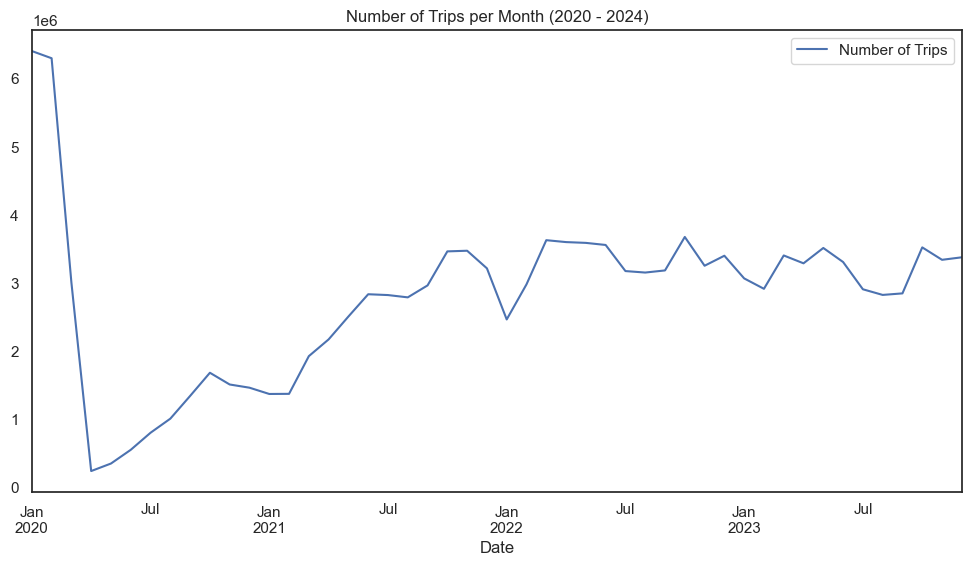

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'monthly_trip_counts_pd' is your Pandas Series
# Convert to DataFrame
df = monthly_trip_counts_pd.reset_index()
df.columns = ['Date', 'Number of Trips']

# Ensure 'Date' is in datetime format for easy filtering
df['Date'] = df['Date'].dt.to_timestamp()

# Filter the DataFrame for dates from 2020 to 2024
# This includes the start of 2020 and goes up to (but not including) the start of 2025
start_date = '2020-01-01'
end_date = '2023-12-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]

# Plotting the filtered data
filtered_df.plot(x='Date', y='Number of Trips', title='Number of Trips per Month (2020 - 2024)', figsize=(12, 6))

# Show the plot
plt.show()

In [ ]:
import dask.dataframe as dd
from sqlalchemy import create_engine

# Database connection details
username = 'root'
password = 'root'
host = 'localhost'
database_name = 'nyc_taxi_data'
table_name = 'nyctaxidata'
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database_name}')

# Path to the directory containing .parquet files
parquet_files_path = 'C:\\Users\\Administrator\\Downloads\\nyc-taxi-data\\subset\\*.parquet'

# Read parquet files into a Dask DataFrame
ddf = dd.read_parquet(parquet_files_path)

# Convert Dask DataFrame to Pandas DataFrame in chunks and store each chunk
for chunk_df in ddf.to_delayed():
    chunk_df = chunk_df.compute()  # Convert Dask DataFrame chunk to Pandas DataFrame
    chunk_df.to_sql(table_name, con=engine, if_exists='append', index=False)

print("Successfully loaded data into the database.")


In [7]:
result.dask

NameError: name 'result' is not defined